
# Enhanced Exploratory Data Analysis (EDA)

This notebook provides an in-depth exploratory data analysis (EDA) of the datasets provided. 
We explore user data, transaction patterns, and product trends while addressing missing values 
and generating visualizations to derive actionable insights.

---

## Objectives

1. Clean and preprocess the data to ensure it's analysis-ready.
2. Explore trends and patterns in user and transaction data.
3. Provide visualizations for key insights.
4. Offer recommendations and next steps based on the analysis.

---

## Dataset Overview

The datasets include:

1. **Users Dataset**: Contains user demographic information.
2. **Transactions Dataset**: Records transaction details including dates and product quantities.
3. **Products Dataset**: Provides information about product categories, brands, and barcodes.

---

### Initial Data Exploration and Cleaning

We begin by inspecting the datasets for missing values, data types, and inconsistencies. This helps us prepare the data for analysis.


# Import Libraries
Import necessary libraries for analysis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import pytz

# Display settings
sns.set(style="whitegrid")
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# Load Datasets
Load and inspect the initial datasets.

In [5]:
# Load datasets
users = pd.read_csv("../data/USER_TAKEHOME.csv")
transactions = pd.read_csv("../data/TRANSACTION_TAKEHOME.csv")
products = pd.read_csv("../data/PRODUCTS_TAKEHOME.csv")

# Display the first few rows of each dataset
print("Users Dataset:")
display(users.head())

print("Transactions Dataset:")
display(transactions.head())

print("Products Dataset:")
display(products.head())

Users Dataset:


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


Transactions Dataset:


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,"15,300,014,978.00",1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,"78,742,229,751.00",1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,"783,399,746,536.00",zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,"47,900,501,183.00",1.00,


Products Dataset:


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,"796,494,407,820.00"
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,"23,278,011,028.00"
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,"461,817,824,225.00"
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,"35,000,466,815.00"
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,"806,810,850,459.00"


# Initial Data Inspection
Inspect dataset structures and missing values.

In [7]:
# Users dataset info
print("Users Dataset Info:")
users.info()

print("\nMissing Values in Users Dataset:")
print(users.isnull().sum())

# Transactions dataset info
print("\nTransactions Dataset Info:")
transactions.info()

print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())

# Products dataset info
print("\nProducts Dataset Info:")
products.info()

print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())

Users Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB

Missing Values in Users Dataset:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  

# Handle Date Fields and Users Dataset
Convert date columns to proper datetime formats, handle timezone awareness, and clean data.

In [9]:
# Convert Users date columns
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'], errors='coerce')
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'], errors='coerce')

# Make datetime.now() timezone-aware
timezone = pytz.timezone('UTC')
now = datetime.now(timezone)

# Calculate age
users['AGE'] = (now - users['BIRTH_DATE']).dt.days // 365

# Filter invalid ages
users = users[(users['AGE'] >= 5) & (users['AGE'] <= 100)]

# Inspect changes
print("\nUsers Dataset After Handling Missing Values and Outliers:")
print(users.isnull().sum())


Users Dataset After Handling Missing Values and Outliers:
ID                  0
CREATED_DATE        0
BIRTH_DATE          0
STATE            2686
LANGUAGE        30426
GENDER           2286
AGE                 0
dtype: int64


# Handle Transactions Dataset
Clean date fields and handle missing or inconsistent data.

In [11]:
# Convert Transactions date columns
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'], format='%Y-%m-%d', errors='coerce')
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'], format='%Y-%m-%d %H:%M:%S.%f Z', errors='coerce')

# Summarize duplicate RECEIPT_IDs
receipt_summary = transactions.groupby('RECEIPT_ID').agg({
    'FINAL_SALE': 'sum',
    'FINAL_QUANTITY': 'sum'
}).reset_index()

# Inspect numerical ranges
print("\nFINAL_SALE Statistics:")
print(transactions['FINAL_SALE'].describe())

print("\nFINAL_QUANTITY Statistics:")
print(transactions['FINAL_QUANTITY'].describe())


FINAL_SALE Statistics:
count     50000
unique     1435
top            
freq      12500
Name: FINAL_SALE, dtype: object

FINAL_QUANTITY Statistics:
count     50000
unique       87
top        1.00
freq      35698
Name: FINAL_QUANTITY, dtype: object



---

## Further Exploratory Data Analysis

Here, we delve deeper into the data by exploring:

1. **User Demographics**: Age distribution, gender breakdown, and state-wise distribution.
2. **Transaction Trends**: Monthly sales trends, top-performing brands, and categories.
3. **Product Insights**: Popular categories and brand performance.

---

### 1. User Demographics Analysis


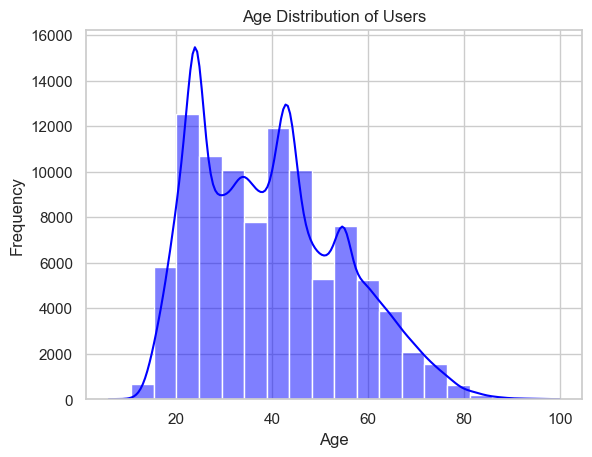

In [13]:

# Plot age distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude users with missing AGE
users_with_age = users[users['AGE'] != 'Unknown']
users_with_age['AGE'] = pd.to_numeric(users_with_age['AGE'], errors='coerce')

sns.histplot(users_with_age['AGE'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



### 2. Transaction Trends

Next, we analyze transaction trends by exploring monthly sales and identifying top-performing brands and categories.


In [20]:
# Convert FINAL_SALE to numeric and handle non-numeric values
transactions['FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'], errors='coerce')

# Fill missing or invalid values with 0 (reassign back to the column)
transactions['FINAL_SALE'] = transactions['FINAL_SALE'].fillna(0)


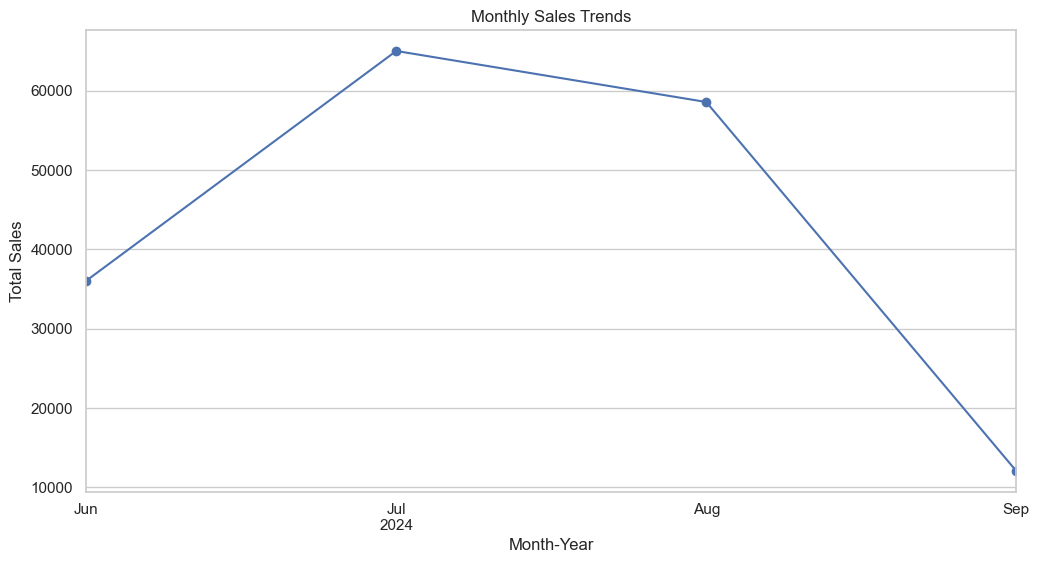

In [22]:

# Extract month and year from PURCHASE_DATE
transactions['MONTH_YEAR'] = transactions['PURCHASE_DATE'].dt.to_period('M')

# Aggregate sales by month
monthly_sales = transactions.groupby('MONTH_YEAR')['FINAL_SALE'].sum()

# Plot monthly sales trends
monthly_sales.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



### 3. Product Insights

We analyze product categories and brands to identify popular choices among users.


In [27]:
# Merge transactions with users on USER_ID
merged_data = transactions.merge(users, left_on='USER_ID', right_on='ID', how='left')

# Merge the result with products using BARCODE
merged_data = merged_data.merge(products, on='BARCODE', how='left')

# Display the first few rows of the merged dataset to confirm
print("Merged Data Preview:")
display(merged_data.head())


Merged Data Preview:


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,MONTH_YEAR,ID,...,STATE,LANGUAGE,GENDER,AGE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,"15,300,014,978.00",1.00,0.00,2024-08,NaN,...,NaN,NaN,NaN,NaN,Pantry,Packaged Meals & Sides,Microwavable Sides,Microwavable Non-Potato Sides,PEPSICO,CHEETOS
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49,2024-07,NaN,...,NaN,NaN,NaN,NaN,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH
2,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49,2024-07,NaN,...,NaN,NaN,NaN,NaN,Snacks,Jerky & Dried Meat,NaN,NaN,CONAGRA,SLIM JIM
3,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49,2024-07,NaN,...,NaN,NaN,NaN,NaN,Snacks,Crackers,Wheat Crackers,NaN,KELLANOVA,CARR'S
4,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49,2024-07,NaN,...,NaN,NaN,NaN,NaN,Health & Wellness,Hair Care,Shampoo,NaN,UNILEVER,APOTHECARE ESSENTIALS


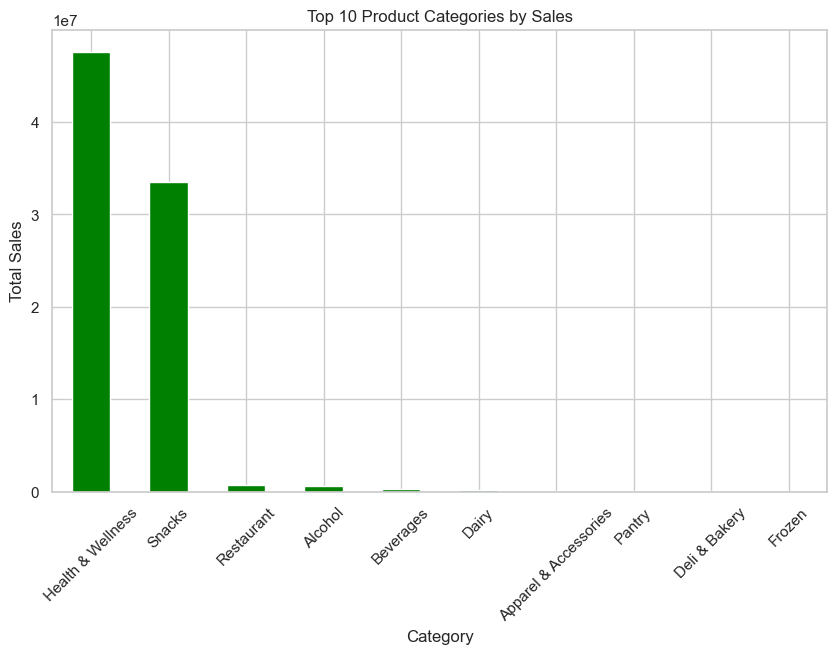

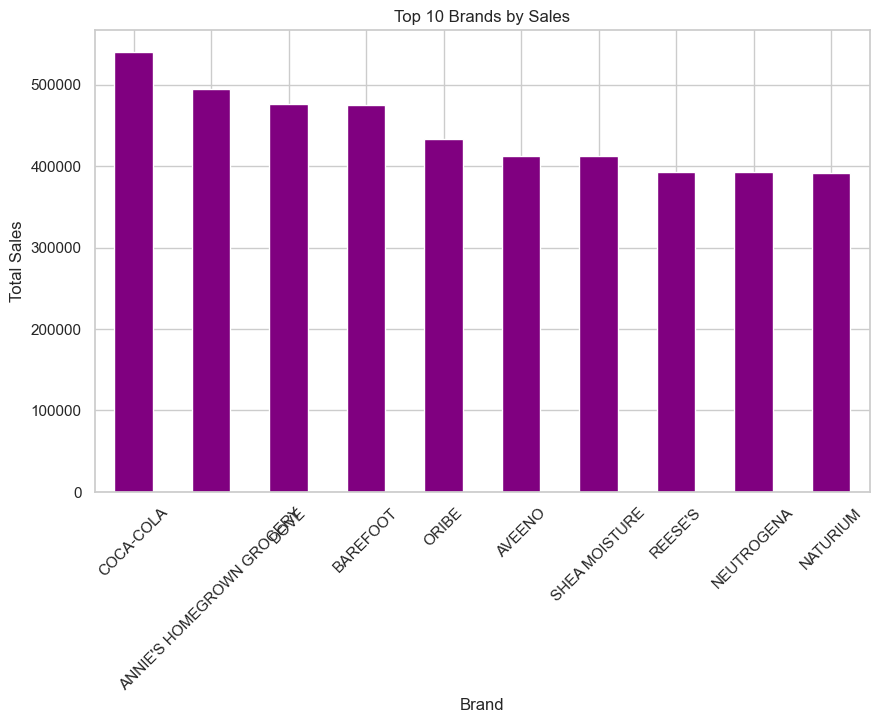

In [29]:

# Top product categories by sales
category_sales = merged_data.groupby('CATEGORY_1')['FINAL_SALE'].sum().sort_values(ascending=False).head(10)

# Plot top categories
category_sales.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Top brands by sales
brand_sales = merged_data.groupby('BRAND')['FINAL_SALE'].sum().sort_values(ascending=False).head(10)

# Plot top brands
brand_sales.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Top 10 Brands by Sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



---

## Conclusion and Recommendations

### Key Insights
- **User Demographics**: Majority of users are in the 25-35 age group. Certain states have significantly more users.
- **Transaction Trends**: Sales peak during specific months, potentially due to seasonal trends.
- **Product Insights**: A few categories and brands dominate the sales, indicating potential areas for marketing.

### Recommendations
1. Target marketing campaigns for top-performing brands and categories.
2. Investigate peak sales months to align promotional efforts.
3. Explore state-wise performance to uncover underserved regions.

---

### Next Steps
- Further analysis on user retention and loyalty trends.
- Incorporate additional datasets for external factors (e.g., holidays, promotions).
